In [2]:
import pandas as pd
df = pd.read_csv('[FOR_DISTRIBUTE]train_data.csv')
X = df[df.columns[3:]].values
Y = df['Class']

In [3]:
import numpy as np
Y_map = dict()
n = 0
for i in set(Y):
    Y_map[i] = n
    n+=1
Y2 = []
for i in Y:
    Y2.append(Y_map[i])
Y2 = np.asarray(Y2)

In [246]:
Y_map

{'A': 5,
 'B': 2,
 'C': 10,
 'D': 3,
 'E': 6,
 'F': 7,
 'G': 0,
 'H': 1,
 'I': 9,
 'J': 11,
 'K': 8,
 'L': 4}

In [32]:
wk = dict()
i= 1
for x in set(df['Weekday']):
    wk[x]= i
    i+=1
wk
wkd = []
for x in df['Weekday']:
    wkd.append(wk[x])
wkd = np.asarray(wkd)
wkd

array([5, 2, 6, ..., 1, 1, 1])

In [61]:
pd.DataFrame(pd.get_dummies(df['Weekday'],prefix = 'Weekday'))

Weekday_Friday  Weekday_Monday  Weekday_Saturday  Weekday_Sunday  \
0                   0               0                 1               0   
1                   0               0                 0               1   
2                   0               1                 0               0   
3                   1               0                 0               0   
4                   1               0                 0               0   
5                   0               0                 0               0   
6                   0               0                 1               0   
7                   1               0                 0               0   
8                   0               0                 0               0   
9                   0               1                 0               0   
10                  0               0                 0               0   
11                  1               0                 0               0   
12                  0               0                 1               0   
13                  1               0                 0               0   
14                  0               0                 0               1   
15                  0               0                 0               0   
16                  0               1                 0               0   
17                  0               0                 0               1   
18                  0               0                 1               0   
19                  0               1                 0               0   
20                  0               1                 0               0   
21                  0               1                 0               0   
22                  1               0                 0               0   
23                  0               0                 1               0   
24                  0               0                 0               1   
25                  0               0                 0               0   
26                  0               1                 0               0   
27                  0               0                 0               0   
28                  0               0                 0               1   
29                  0               0                 1               0   
...               ...             ...               ...             ...   
75644               0               1                 0               0   
75645               0               0                 0               0   
75646               0               1                 0               0   
75647               0               0                 0               0   
75648               0               0                 0               0   
75649               0               0                 1               0   
75650               0               0                 0               1   
75651               0               0                 1               0   
75652               0               0                 0               1   
75653               0               1                 0               0   
75654               1               0                 0               0   
75655               0               0                 0               1   
75656               0               0                 0               0   
75657               0               1                 0               0   
75658               0               0                 0               0   
75659               0               0                 0               0   
75660               1               0                 0               0   
75661               1               0                 0               0   
75662               0               0                 0               1   
75663               0               0                 1               0   
75664               0               0                 0               0   
75665               1           

In [64]:
df2 = pd.concat([df, pd.DataFrame(pd.get_dummies(df['Weekday'],prefix = 'Weekday'))], axis=1)

In [71]:
df = pd.read_csv('[FOR_DISTRIBUTE]train_data.csv')
df2 = pd.concat([df, pd.DataFrame(pd.get_dummies(df['Weekday'],prefix = 'Weekday'))], axis=1)
X = df2[df2.columns[3:]].values

In [50]:
?pd.get_dummies

In [42]:
df['WKD'] = wkd
X=df[df.columns[3:]].values

In [72]:
from sklearn.cross_validation import train_test_split
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, Y2,test_size=test_size)

In [7]:
from sklearn.ensemble import RandomForestClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestClassifier()
# Train the model using the training sets and check score
model.fit(X_train, y_train)
#Predict Output
predicted= model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.71%


In [9]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.51%


In [129]:
model= RandomForestClassifier(n_estimators=100,
#                               criterion='entropy',
                              n_jobs=4,
                              oob_score=True,
                              warm_start=True
                             )
print(model)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=True, random_state=None, verbose=0, warm_start=True)
Accuracy: 58.69%


In [120]:
len(X_train[0])

60

In [118]:
?RandomForestClassifier

In [74]:
importances = model.feature_importances_

In [75]:
importances

array([ 0.01093367,  0.01405436,  0.01402126,  0.00917823,  0.02112034,
        0.00653539,  0.00339153,  0.00841211,  0.00480448,  0.01849633,
        0.01610096,  0.01844915,  0.0145113 ,  0.03693565,  0.06048486,
        0.00979314,  0.01079058,  0.03047597,  0.02201893,  0.00703207,
        0.05240795,  0.01219946,  0.01203048,  0.01459369,  0.00762445,
        0.02743183,  0.02135186,  0.03718361,  0.00827884,  0.02150143,
        0.01637158,  0.01348203,  0.01144579,  0.01389827,  0.00788187,
        0.02604408,  0.01436001,  0.00519001,  0.04069587,  0.01604544,
        0.00149344,  0.01205038,  0.0396599 ,  0.00369009,  0.02548085,
        0.00146685,  0.01410507,  0.00569555,  0.01269739,  0.00229733,
        0.01426929,  0.00665781,  0.04368477,  0.01455431,  0.01399265,
        0.01587172,  0.01616421,  0.0127309 ,  0.01320098,  0.01267764])

In [79]:
importances = model.feature_importances_
indices = np.argsort(importances)
col_name = df2.columns[3:]
y_ = [importances[x__] for x__ in indices][:20]
y_.reverse()
x_label = [col_name[x__] for x__ in indices][:20]
x_label.reverse()
from matplotlib import pyplot as plt
plt.plot(y_)
plt.xticks(np.arange(len(y_)),x_label,rotation =90)
plt.show()

In [101]:
y_ = [importances[x__] for x__ in indices][:20]
y_.reverse()
x_label = [col_name[x__] for x__ in indices][:20]
x_label.reverse()

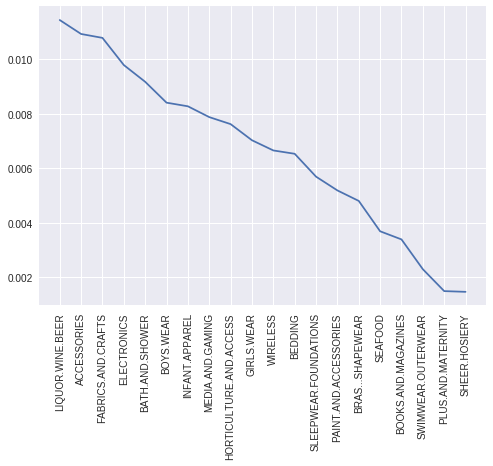

In [130]:
from matplotlib import pyplot as plt
plt.plot(y_)
plt.xticks(np.arange(len(y_)),x_label,rotation =90)
plt.show()

In [247]:
c_name = [y for [x,y] in [[Y_map[x],x] for x in Y_map]]
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=c_name, index=c_name)
sns.heatmap(cm, annot=False)

In [113]:
c_name = [y for [x,y] in [[Y_map[x],x] for x in Y_map]]

In [ ]:
df[(df['Class'] == "K")].sum()[3:]

In [154]:
df[(df['Class'] == "K")]
df_fix = pd.DataFrame(pd.get_dummies(df['Weekday'],prefix = 'Weekday'))
# df_fix = pd.concat([df_fix, df_], axis=1)


pd.concat([pd.Series(df[(df['Class'] == "K")].sum()[3:], name = 'K'),pd.Series(df[(df['Class'] == "A")].sum()[3:], name = 'A')], axis=1)

K     A
ACCESSORIES                   736   486
AUTOMOTIVE                    720    61
BAKERY                        271   108
BATH.AND.SHOWER               925    38
BEAUTY                       1358   227
BEDDING                       294    12
BOOKS.AND.MAGAZINES           205    16
BOYS.WEAR                     680    18
BRAS...SHAPEWEAR              271     5
CANDY..TOBACCO..COOKIES       611   817
CELEBRATION                  1990    91
COMM.BREAD                    369   141
COOK.AND.DINE                1183    70
DAIRY                        1094   322
DSD.GROCERY                  2686  1013
ELECTRONICS                   263    31
FABRICS.AND.CRAFTS           1215    78
FINANCIAL.SERVICES            289  4658
FROZEN.FOODS                  586   212
GIRLS.WEAR                    919    14
GROCERY.DRY.GOODS            1839   524
HARDWARE                      908    53
HOME.DECOR                    752    85
HOME.MANAGEMENT               990    69
HORTICULTURE.AND.ACCESS       576    16
HOUSEHOLD.CHEMICALS.SUPP     1322   168
HOUSEHOLD.PAPER.GOODS         782   173
IMPULSE.MERCHANDISE          2688  1346
INFANT.APPAREL               1267    12
INFANT.CONSUMABLE.HARDLINES   744    37
LADIESWEAR                   1236    45
LAWN.AND.GARDEN               938    86
LIQUOR.WINE.BEER              242   995
MEAT...FRESH...FROZEN         155    27
MEDIA.AND.GAMING              380    22
MENSWEAR                     1530    93
OFFICE.SUPPLIES              1406   101
PAINT.AND.ACCESSORIES         363    19
PERSONAL.CARE                3174   955
PETS.AND.SUPPLIES             615   146
PLUS.AND.MATERNITY             67     0
PRE.PACKED.DELI               211    45
PRODUCE                      1095   503
SEAFOOD                        35     5
SERVICE.DELI                  301   160
SHEER.HOSIERY                  89     5
SHOES                        1207    51
SLEEPWEAR.FOUNDATIONS         333    17
SPORTING.GOODS                797    44
SWIMWEAR.OUTERWEAR            109     2
TOYS                         1297    28
WIRELESS                       88     9
PHARMACY                     1612  7819

In [167]:
df_sum = df2.groupby("Class").mean()

In [176]:
plt.figure(figsize = [20,4])
sns.heatmap(df_sum[[x for x in df_sum.columns[1:]] ], annot=False,
            vmin=0.0, vmax=0.8
           )
plt.savefig("./Fig_Stat.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [183]:
mean = df2.mean()
std = df2.std()

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


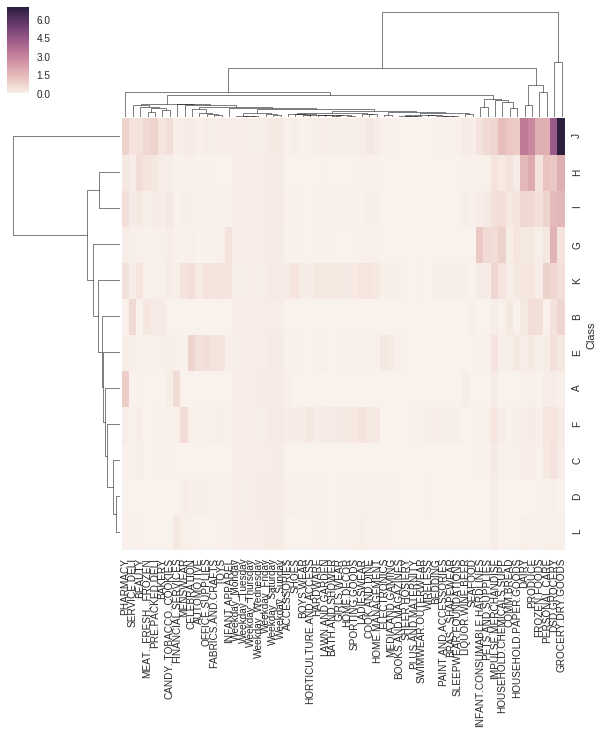

In [181]:
plt.figure(figsize = [20,4])
sns.clustermap(df_sum[[x for x in df_sum.columns[1:]] ]
#                , cmap='RdYlGn_r'
#                , xticklabels=False, yticklabels=False
              )

In [194]:
df3 = df2
for x in df3.index :
    df3.loc[x] = (df2.loc[x] - mean) / std
#     break


In [198]:
X = df3[df3.columns[3:]].values

In [199]:
from sklearn.cross_validation import train_test_split
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, Y2,test_size=test_size)

In [225]:
df_sum = df3.groupby("Class").mean()
df_sum

ID  ACCESSORIES  AUTOMOTIVE    BAKERY  BATH.AND.SHOWER    BEAUTY  \
Class                                                                           
A      0.009655     0.044727   -0.125166 -0.167318        -0.091249 -0.178148   
B     -0.009146    -0.122049   -0.126049  0.243423        -0.098554 -0.196157   
C      0.005255    -0.128890   -0.131355 -0.108271        -0.096002 -0.091720   
D      0.003374     0.056982    0.093369 -0.181326        -0.057083 -0.196527   
E     -0.017547    -0.083163    0.906422 -0.015347        -0.056358 -0.130190   
F      0.018314     0.195260   -0.078089 -0.127787         0.279657 -0.043976   
G     -0.002503    -0.093930   -0.082666 -0.016987        -0.048719 -0.122761   
H     -0.008104    -0.077910   -0.084429  0.155308        -0.057094  0.495261   
I     -0.007310    -0.053917   -0.031027  0.147891        -0.030077  0.093545   
J     -0.006803     0.014776    0.025366  0.554290         0.094555  0.388273   
K      0.018289     0.462227    0.325213 -0.026835         0.372362  0.294769   
L     -0.015203    -0.083483   -0.083508 -0.155234        -0.069460 -0.148433   

        BEDDING  BOOKS.AND.MAGAZINES  BOYS.WEAR  BRAS...SHAPEWEAR  \
Class                                                               
A     -0.086592            -0.054500  -0.089945         -0.090541   
B     -0.089549            -0.052265  -0.093250         -0.091438   
C     -0.090365            -0.057653  -0.092649         -0.092002   
D     -0.047956            -0.001468  -0.026597         -0.019728   
E     -0.066527             0.135426  -0.054764         -0.063877   
F      0.377445            -0.010547   0.335014          0.307682   
G     -0.071631            -0.032317  -0.056593         -0.047740   
H     -0.070163            -0.017792  -0.075010         -0.068200   
I     -0.022730            -0.000367  -0.053408         -0.034924   
J      0.033537             0.088075   0.013351          0.029549   
K      0.183745             0.292124   0.343288          0.240662   
L     -0.045410            -0.053385  -0.055489         -0.018650   

             ...              TOYS  WIRELESS  PHARMACY  Weekday_Friday  \
Class        ...                                                         
A            ...         -0.139673 -0.095475  0.723988        0.074440   
B            ...         -0.140312 -0.091021 -0.282627       -0.025921   
C            ...         -0.143062 -0.100082 -0.257072       -0.005250   
D            ...         -0.016516  0.063577 -0.287959        0.020898   
E            ...          0.592391 -0.028784 -0.211830        0.012671   
F            ...          0.040610  0.456796 -0.153441       -0.006862   
G            ...         -0.060133 -0.091609 -0.193139       -0.002469   
H            ...         -0.092010 -0.088196 -0.010498       -0.008378   
I            ...         -0.048850 -0.072282  0.219013       -0.017713   
J            ...          0.103415 -0.061211  0.574021       -0.057642   
K            ...          0.607465  0.032451  0.153554       -0.012697   
L            ...         -0.087746 -0.019856 -0.261198       -0.003745   

       Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
Class                                                                       
A           -0.011600         -0.009178       -0.135637          0.019146   
B            0.042772         -0.068452       -0.061235          0.044814   
C            0.009531         -0.038111       -0.033306          0.032679   
D           -0.032260          0.026765        0.002049          0.016605   
E           -0.053259          0.067463        0.017858         -0.007533   
F           -0.020973          0.038077        0.048905         -0.014122   
G            0.009637         -0.022423        0.001037         -0.014892   
H            0.021748         -0.030198        0.021178         -0.002334   
I            0.021386         -0.015339        0.042089         -0.015969   
J            0.004406      

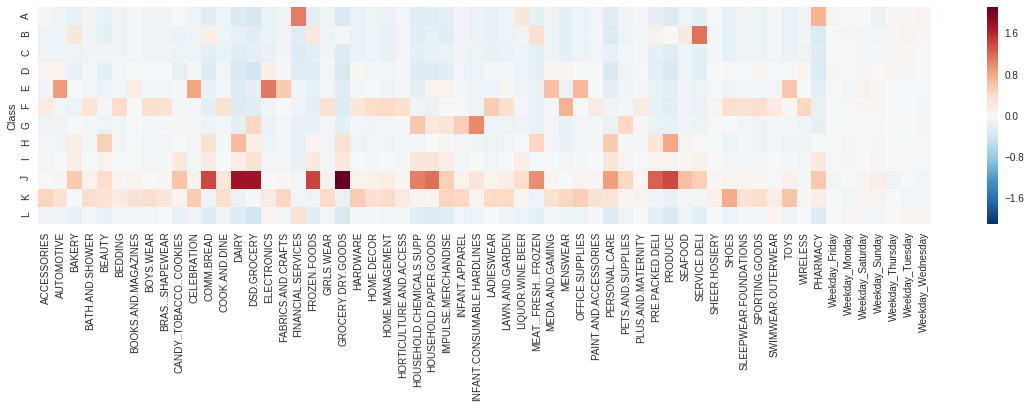

In [230]:
plt.figure(figsize = [20,4])
sns.heatmap(df_sum[[x for x in df_sum.columns[1:]] ], annot=False,
#             vmin=0.0, vmax=0.8
           )
plt.savefig("./Fig_Stat.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [242]:
df_sum.loc['K'].sort_values(ascending=False).index[:5]

Index(['SHOES', 'TOYS', 'CELEBRATION', 'HARDWARE', 'OFFICE.SUPPLIES'], dtype='object')

In [245]:
df_sum['SHOES']+df_sum['TOYS']+df_sum['CELEBRATION']

Class
A   -0.417951
B   -0.427466
C   -0.432226
D   -0.039306
E    1.325498
F    0.327463
G   -0.144884
H   -0.285612
I   -0.146579
J    0.249265
K    1.927317
L   -0.300027
dtype: float64

In [248]:
df3['SPEC1'] = df3['SHOES']+df3['TOYS']+df3['CELEBRATION']

In [257]:
df3[df3.columns[59:]]

Weekday_Sunday  Weekday_Thursday  Weekday_Tuesday  Weekday_Wednesday  \
0           -0.465783         -0.364010        -0.369044          -0.370706   
1            2.146895         -0.364010        -0.369044          -0.370706   
2           -0.465783         -0.364010        -0.369044          -0.370706   
3           -0.465783         -0.364010        -0.369044          -0.370706   
4           -0.465783         -0.364010        -0.369044          -0.370706   
5           -0.465783         -0.364010        -0.369044           2.697521   
6           -0.465783         -0.364010        -0.369044          -0.370706   
7           -0.465783         -0.364010        -0.369044          -0.370706   
8           -0.465783         -0.364010        -0.369044           2.697521   
9           -0.465783         -0.364010        -0.369044          -0.370706   
10          -0.465783         -0.364010         2.709670          -0.370706   
11          -0.465783         -0.364010        -0.369044          -0.370706   
12          -0.465783         -0.364010        -0.369044          -0.370706   
13          -0.465783         -0.364010        -0.369044          -0.370706   
14           2.146895         -0.364010        -0.369044          -0.370706   
15          -0.465783         -0.364010         2.709670          -0.370706   
16          -0.465783         -0.364010        -0.369044          -0.370706   
17           2.146895         -0.364010        -0.369044          -0.370706   
18          -0.465783         -0.364010        -0.369044          -0.370706   
19          -0.465783         -0.364010        -0.369044          -0.370706   
20          -0.465783         -0.364010        -0.369044          -0.370706   
21          -0.465783         -0.364010        -0.369044          -0.370706   
22          -0.465783         -0.364010        -0.369044          -0.370706   
23          -0.465783         -0.364010        -0.369044          -0.370706   
24           2.146895         -0.364010        -0.369044          -0.370706   
25          -0.465783          2.747139        -0.369044          -0.370706   
26          -0.465783         -0.364010        -0.369044          -0.370706   
27          -0.465783         -0.364010         2.709670          -0.370706   
28           2.146895         -0.364010        -0.369044          -0.370706   
29          -0.465783         -0.364010        -0.369044          -0.370706   
...               ...               ...              ...                ...   
75644       -0.465783         -0.364010        -0.369044          -0.370706   
75645       -0.465783          2.747139        -0.369044          -0.370706   
75646       -0.465783         -0.364010        -0.369044          -0.370706   
75647       -0.465783         -0.364010        -0.369044           2.697521   
75648       -0.465783         -0.364010        -0.369044           2.697521   
75649       -0.465783         -0.364010        -0.369044          -0.370706   
75650        2.146895         -0.364010        -0.369044          -0.370706   
75651       -0.465783         -0.364010        -0.369044          -0.370706   
75652        2.146895         -0.364010        -0.369044          -0.370706   
75653       -0.465783         -0.364010        -0.369044          -0.370706   
75654       -0.465783         -0.364010        -0.369044          -0.370706   
75655        2.146895         -0.364010        -0.369044          -0.370706   
75656       -0.465783         -0.364010         2.709670          -0.370706   
75657       -0.465783         -0.364010        -0.369044          -0.370706   
75658       -0.465783          2.747139        -0.369044          -0.370706   
75659       -0.465783          2.747139        -0.369044          -0.370706   
75660       -0.465783         -0.364010        -0.369044          -0.370706   
75661       -0.465783         -0.364010        -0.369044          -0.370706   
75662        2.146895         -0.364010        -0.369044 

In [260]:
X = df3[df3.columns[3:]].values

In [283]:
from sklearn.cross_validation import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y2,test_size=test_size)

model= RandomForestClassifier(n_estimators=200,
#                               criterion='entropy',
                              min_samples_leaf=2,
                              min_samples_split=10,
                              n_jobs=8,
                              oob_score=True,
#                               warm_start=True
                             )
print(model)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=8,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Accuracy: 61.94%


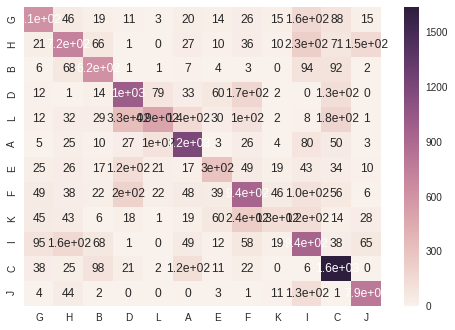

In [284]:
c_name = [y for [x,y] in [[Y_map[x],x] for x in Y_map]]
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=c_name, index=c_name)
sns.heatmap(cm, annot=True)

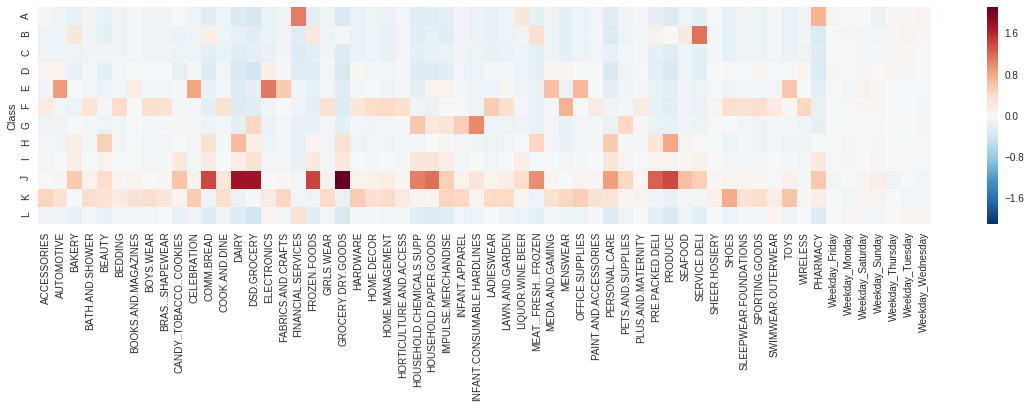

In [285]:
plt.figure(figsize = [20,4])
sns.heatmap(df_sum[[x for x in df_sum.columns[1:]] ], annot=False,
#             vmin=0.0, vmax=0.8
           )
plt.savefig("./Fig_Stat.pdf", format='pdf', bbox_inches='tight')
plt.show()

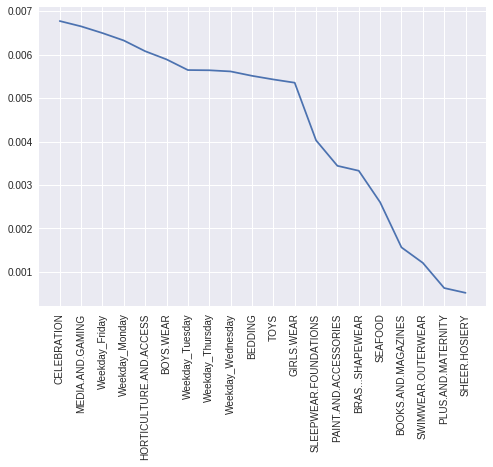

In [288]:
importances = model.feature_importances_
indices = np.argsort(importances)
col_name = df2.columns[3:]
y_ = [importances[x__] for x__ in indices][:20]
y_.reverse()
x_label = [col_name[x__] for x__ in indices][:20]
x_label.reverse()
from matplotlib import pyplot as plt
plt.plot(y_)
plt.xticks(np.arange(len(y_)),x_label,rotation =90)
plt.show()

In [289]:
df_sum.loc['K'].sort_values(ascending=True).index[:5]

Index(['PRODUCE', 'GROCERY.DRY.GOODS', 'DAIRY', 'MEAT...FRESH...FROZEN',
       'COMM.BREAD'],
      dtype='object')

In [292]:
df_sum[df_sum.loc['K'].sort_values(ascending=True).index[:5]]

PRODUCE  GROCERY.DRY.GOODS     DAIRY  MEAT...FRESH...FROZEN  \
Class                                                                 
A     -0.294284          -0.301928 -0.312588              -0.191847   
B      0.007213          -0.052175 -0.177936               0.346749   
C     -0.237675          -0.278570 -0.239149              -0.194644   
D     -0.321894          -0.320778 -0.329459              -0.197182   
E     -0.191309          -0.231681 -0.251760              -0.148784   
F     -0.223841          -0.250144 -0.254322              -0.175807   
G     -0.174032          -0.189190 -0.189525              -0.163948   
H      0.817914           0.302105  0.670170               0.461375   
I      0.069285           0.222443  0.146132              -0.025023   
J      1.395852           2.110026  1.781734               0.988731   
K     -0.149021          -0.146317 -0.143183              -0.122298   
L     -0.307597          -0.305451 -0.289913              -0.193997   

       COMM.BREAD  
Class              
A       -0.241626  
B        0.158764  
C       -0.207871  
D       -0.258819  
E       -0.165799  
F       -0.211783  
G       -0.124390  
H        0.303162  
I        0.165351  
J        1.397624  
K       -0.118583  
L       -0.253375

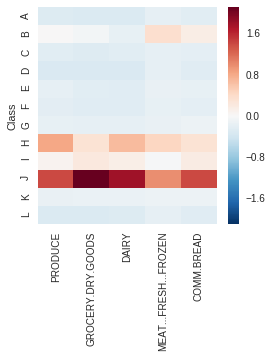

In [295]:
plt.figure(figsize = [4,4])
sns.heatmap(df_sum[df_sum.loc['K'].sort_values(ascending=True).index[:5]],
            annot=False,
#             vmin=0.0, vmax=0.8
           )
plt.savefig("./Fig_Stat.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [298]:
_index = df_sum.loc['K'].sort_values(ascending=True).index[:5]
_index[0]

'PRODUCE'

In [299]:
df3['SPEC2'] = df3[_index[0]]
_index = df_sum.loc['K'].sort_values(ascending=True).index[:5]
for idx in _index[1:]:
    df3['SPEC2'] += df3[idx]

In [401]:
def proc1():
    from matplotlib import pyplot as plt
    c_name = [y for [x,y] in [[Y_map[x],x] for x in Y_map]]
    from sklearn.metrics import confusion_matrix
    cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=c_name, index=c_name)
    sns.heatmap(cm, annot=True)
    
    plt.figure(figsize = [20,4])
    df_sum = df3.groupby("Class").mean()
    sns.heatmap(df_sum[[x for x in df_sum.columns[1:]] ], annot=False,
                vmin=-0.3, vmax=0.8
               )
    plt.savefig("./Fig_Stat.pdf", format='pdf', bbox_inches='tight')
    plt.show()
    
    importances = model.feature_importances_
    indices = np.argsort(importances)
    col_name = df3.columns[3:]
    y_ = [importances[indices[x__]] for x__ in range(20)]
    y_.reverse()
    x_label = [col_name[indices[x__]] for x__ in range(20)]
    x_label.reverse()
    from matplotlib import pyplot as plt
    plt.plot(y_)
    plt.xticks(np.arange(len(y_)),x_label,rotation =90)
    plt.show()

In [303]:
X = df3[df3.columns[3:]]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=8,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Accuracy: 61.45%


In [305]:
X = df3[df3.columns[3:]]
from sklearn.cross_validation import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y2,test_size=test_size)

model= RandomForestClassifier(n_estimators=300,
#                               criterion='entropy',
                              min_samples_leaf=2,
                              min_samples_split=10,
                              n_jobs=8,
                              oob_score=True,
#                               warm_start=True
                             )
print(model)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=8,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Accuracy: 62.13%


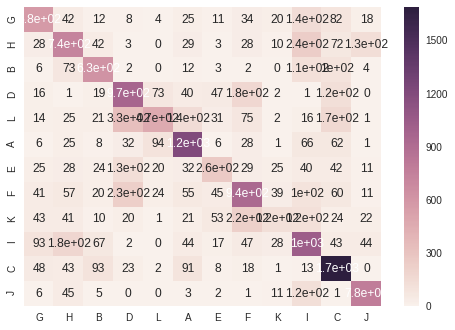

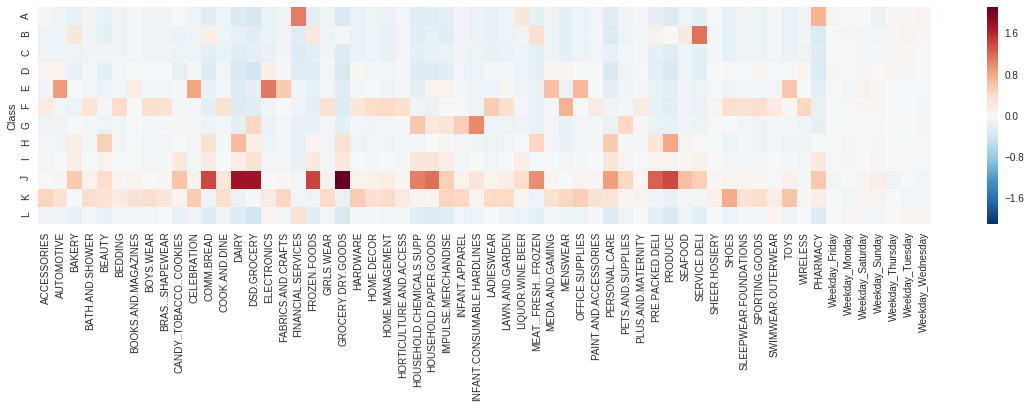

In [309]:
proc1()

In [311]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=c_name, index=c_name)
cm

G    H    B    D    L     A    E    F    K     I     C    J
G  579   42   12    8    4    25   11   34   20   145    82   18
H   28  737   42    3    0    29    3   28   10   240    72  126
B    6   73  626    2    0    12    3    2    0   114   103    4
D   16    1   19  970   73    40   47  178    2     1   125    0
L   14   25   21  333  467   142   31   75    2    16   166    1
A    6   25    8   32   94  1207    6   28    1    66    62    1
E   25   28   24  130   20    32  258   29   25    40    42   11
F   41   57   20  234   24    55   45  938   39   104    60   11
K   43   41   10   20    1    21   53  220  120   118    24   22
I   93  184   67    2    0    44   17   47   28  1031    43   44
C   48   43   93   23    2    91    8   18    1    13  1688    0
J    6   45    5    0    0     3    2    1   11   121     1  783

In [331]:
from collections import Counter
cnt_ = Counter(y_test)
for x in cnt_.keys():
    print(c_name[x],cnt_[x])

I 1600
C 2028
B 945
K 693
F 1628
J 978
D 1472
A 1536
E 664
H 1318
L 1293
G 980


In [341]:
_index = df_sum.loc['L'].sort_values(ascending=True).index[-7:-3]

In [342]:
cls = 'L'
spec_n = 'SPEC_L-1'
df3[spec_n] = df3[_index[0]]
for idx in _index[1:]:
    df3[spec_n] += df3[idx]
df3.columns[60:]

Index(['Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'SPEC1',
       'SPEC2', 'SPEC_L-1'],
      dtype='object')

In [345]:
df_sum.loc['L'].sort_values(ascending=True).index[-1]

'FINANCIAL.SERVICES'

In [353]:
cls = 'L'
spec_n = 'SPEC_L-FINAN**100'
df3[spec_n] = df3['FINANCIAL.SERVICES']*100

0     H
1     A
2     H
3     E
4     G
5     A
6     L
7     C
8     C
9     I
10    G
11    H
12    C
13    A
14    F
15    D
16    I
17    L
18    E
19    L
20    B
21    K
22    F
23    I
24    H
25    A
26    L
27    I
28    G
29    J
30    D
31    A
32    C
33    D
34    K
35    F
36    C
37    C
38    L
39    D
Name: Class, dtype: object

In [354]:
X = df3[df3.columns[3:]]
from sklearn.cross_validation import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y2,test_size=test_size)

model= RandomForestClassifier(n_estimators=300,
#                               criterion='entropy',
                              min_samples_leaf=2,
                              min_samples_split=10,
                              n_jobs=8,
                              oob_score=True,
#                               warm_start=True
                             )
print(model)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=8,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Accuracy: 61.85%


In [355]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=c_name, index=c_name)
cm

G    H    B    D    L     A    E    F    K    I     C    J
G  568   46   16   11    3    16   16   28   12  144    95   11
H   30  738   54    4    1    25    5   35   10  230    84  135
B    3   63  615    1    2     7    2    2    0   79    99    4
D   22    1    9  978   63    39   65  197    3    0   128    0
L   24   32   21  320  478   169   30  100    2   12   172    0
A    9   20    9   29   92  1203    5   32    4   73    60    3
E   40   33   21  136   20    35  297   40   23   47    47    8
F   42   77   27  230   32    40   32  891   40  130    55    4
K   32   29   10   34    0    24   53  212  131  116    23   29
I   80  157   75    3    0    45   12   41   17  965    35   61
C   50   24   85   13    2    92    6   19    0   10  1699    0
J    5   39    2    0    0     2    4    1    6  149     0  798

In [356]:
cnt_ = Counter(y_test)
for x in cnt_.keys():
    print(c_name[x],cnt_[x])

F 1600
J 1006
B 877
I 1491
C 2000
L 1360
H 1351
G 966
E 747
K 693
A 1539
D 1505


In [366]:
_index = df[(df['Class']=='L')].sum()[3:].sort_values(ascending=False).index[:12]

In [367]:
cls = 'L'
spec_n = 'SPEC_L_TOP12'
df3[spec_n] = df3[_index[0]]
for idx in _index[1:]:
    df3[spec_n] += df3[idx]
df3.columns[60:]

Index(['Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'SPEC1',
       'SPEC2', 'SPEC_L-1', 'SPEC_L-FINAN**100', 'SPEC_L_TOP12'],
      dtype='object')

In [370]:
X = df3[df3.columns[3:]]
from sklearn.cross_validation import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y2,test_size=test_size)

model= RandomForestClassifier(n_estimators=300,
#                               criterion='entropy',
                              min_samples_leaf=2,
                              min_samples_split=20,
                              n_jobs=8,
                              oob_score=True,
#                               warm_start=True
                             )
print(model)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=8,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Accuracy: 61.51%


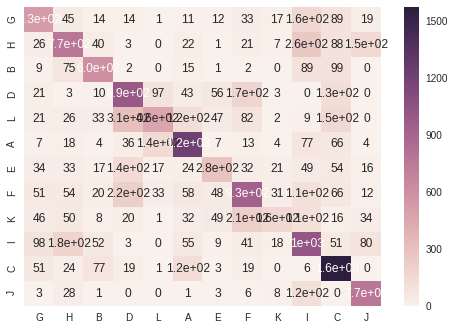

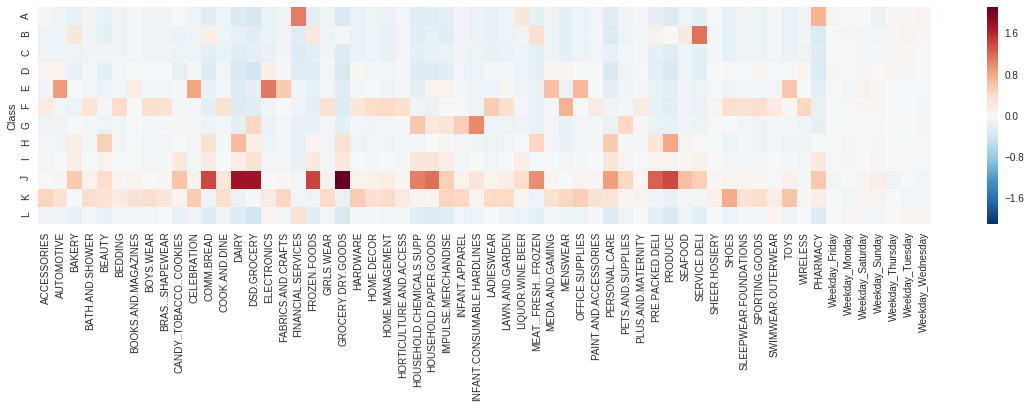

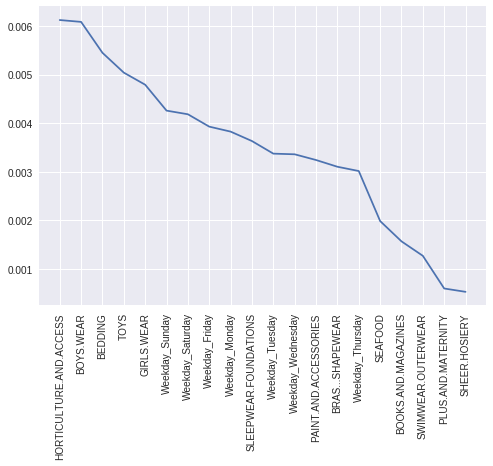

In [371]:
proc1()

In [372]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=c_name, index=c_name)
cm

G    H    B    D    L     A    E    F    K     I     C    J
G  532   45   14   14    1    11   12   33   17   163    89   19
H   26  773   40    3    0    22    1   21    7   257    88  146
B    9   75  605    2    0    15    1    2    0    89    99    0
D   21    3   10  990   97    43   56  173    3     0   126    0
L   21   26   33  308  461   125   47   82    2     9   152    0
A    7   18    4   36  142  1214    7   13    4    77    66    4
E   34   33   17  140   17    24  284   32   21    49    54   16
F   51   54   20  220   33    58   48  934   31   109    66   12
K   46   50    8   20    1    32   49  213  161   109    16   34
I   98  179   52    3    0    55    9   41   18  1014    51   80
C   51   24   77   19    1   120    3   19    0     6  1573    0
J    3   28    1    0    0     1    3    6    8   116     0  769

In [390]:
XX = df[df.columns[3:]].values
cnt_prod = []
for x in XX:
    cnt_prod.append(len([y for y in x if y>0]))
cnt_prod = np.asarray(cnt_prod).reshape(75674,1)

In [392]:
df3['cnt_prod'] = cnt_prod

In [393]:
df3

ID Class Weekday  ACCESSORIES  AUTOMOTIVE    BAKERY  \
0     -1.731193     H     NaN    -0.136707   -0.143379 -0.198748   
1     -1.731157     A     NaN    -0.136707   -0.143379 -0.198748   
2     -1.731120     H     NaN    -0.136707   -0.143379 -0.198748   
3     -1.731084     E     NaN    -0.136707   -0.143379 -0.198748   
4     -1.731048     G     NaN    -0.136707   -0.143379 -0.198748   
5     -1.730903     A     NaN    -0.136707   -0.143379 -0.198748   
6     -1.730867     L     NaN    -0.136707   -0.143379 -0.198748   
7     -1.730831     C     NaN    -0.136707   -0.143379 -0.198748   
8     -1.730794     C     NaN    -0.136707   -0.143379 -0.198748   
9     -1.730758     I     NaN    -0.136707   -0.143379 -0.198748   
10    -1.730686     G     NaN    -0.136707   -0.143379 -0.198748   
11    -1.730649     H     NaN    -0.136707   -0.143379 -0.198748   
12    -1.730577     C     NaN    -0.136707   -0.143379 -0.198748   
13    -1.730541     A     NaN    -0.136707   -0.143379 -0.198748   
14    -1.730505     F     NaN    -0.136707   -0.143379 -0.198748   
15    -1.730432     D     NaN    -0.136707    2.183962 -0.198748   
16    -1.730396     I     NaN    -0.136707   -0.143379 -0.198748   
17    -1.730360     L     NaN    -0.136707   -0.143379 -0.198748   
18    -1.730323     E     NaN    -0.136707   -0.143379 -0.198748   
19    -1.730287     L     NaN    -0.136707   -0.143379 -0.198748   
20    -1.730251     B     NaN    -0.136707   -0.143379 -0.198748   
21    -1.730215     K     NaN    -0.136707   -0.143379 -0.198748   
22    -1.730106     F     NaN     5.683374   -0.143379 -0.198748   
23    -1.730070     I     NaN    -0.136707   -0.143379 -0.198748   
24    -1.729997     H     NaN    -0.136707   -0.143379 -0.198748   
25    -1.729925     A     NaN    -0.136707   -0.143379 -0.198748   
26    -1.729889     L     NaN    -0.136707   -0.143379 -0.198748   
27    -1.729816     I     NaN    -0.136707   -0.143379 -0.198748   
28    -1.729744     G     NaN    -0.136707   -0.143379 -0.198748   
29    -1.729708     J     NaN    -0.136707   -0.143379  2.069738   
...         ...   ...     ...          ...         ...       ...   
75644  1.732993     H     NaN    -0.136707   -0.143379 -0.198748   
75645  1.733030     A     NaN    -0.136707   -0.143379 -0.198748   
75646  1.733102     H     NaN    -0.136707   -0.143379 -0.198748   
75647  1.733138     F     NaN    -0.136707   -0.143379 -0.198748   
75648  1.733175     A     NaN    -0.136707   -0.143379 -0.198748   
75649  1.733211     F     NaN    -0.136707   -0.143379 -0.198748   
75650  1.733283     D     NaN    -0.136707    2.183962 -0.198748   
75651  1.733392     C     NaN    -0.136707   -0.143379 -0.198748   
75652  1.733428     K     NaN     5.683374   -0.143379 -0.198748   
75653  1.733464     A     NaN    -0.136707   -0.143379 -0.198748   
75654  1.733537     E     NaN    -0.136707    2.183962 -0.198748   
75655  1.733573     D     NaN     2.773333   -0.143379 -0.198748   
75656  1.733645     L     NaN    -0.136707   -0.143379 -0.198748   
75657  1.733718     A     NaN    -0.136707   -0.143379 -0.198748   
75658  1.733754     F     NaN    -0.136707   -0.143379 -0.198748   
75659  1.733790     H     NaN    -0.136707   -0.143379 -0.198748   
75660  1.733863     B     NaN    -0.136707   -0.143379 -0.198748   
75661  1.733935     K     NaN    -0.136707   -0.143379 -0.198748   
75662  1.733971     E     NaN    -0.136707   -0.143379 -0.198748   
75663  1.734008     F     NaN    -0.136707   -0.143379 -0.198748   
75664  1.734080     E     NaN    -0.136707   -0.143379 -0.198748   
75665  1.734116     D     NaN    -0.136707   -0.143379 -0.198748   
75666  1.734153     H     NaN    -0.136707   -0.143379  2.069738   
75667  1.734189     H     NaN    -0.136707   -0.143379 -0.198748   
75668  1.734225     L     NaN    -0.136707   -0.143379 -0.198748   
75669  1.734261     D     NaN    -0.136707   -0.143379 -0.198748   
75670  1.734297     A     NaN    -0.136707   -0.143379 -0.198748   
7

In [403]:
X = df3[df3.columns[3:]]
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y2,test_size=test_size)

model= RandomForestClassifier(n_estimators=300,
#                               criterion='entropy',
                              min_samples_leaf=2,
                              min_samples_split=20,
                              n_jobs=8,
                              oob_score=True,
#                               warm_start=True
                             )
print(model)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=8,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Accuracy: 62.99%


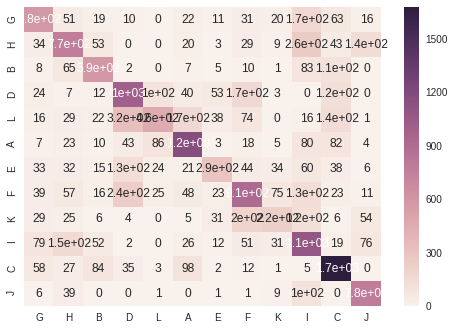

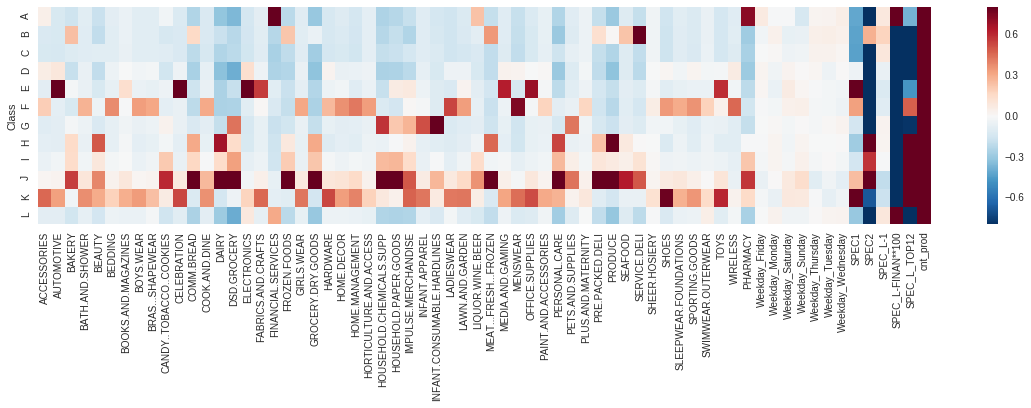

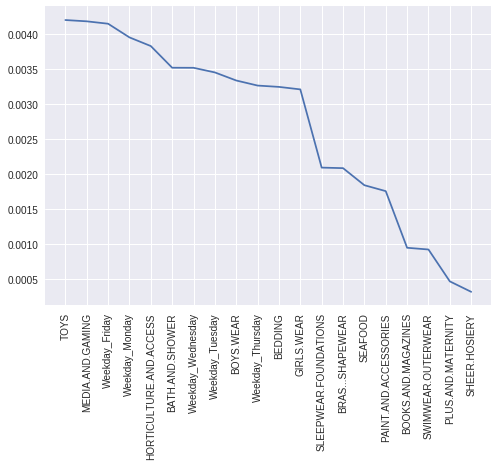

In [404]:
proc1()

In [405]:
import xgboost

In [411]:
model = xgboost.XGBClassifier(n_jobs=8,
                             n_estimators=200,
                              max_depth=5
                             )
model.fit(X_train, y_train)
predicted= model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.75%
